<a href="https://colab.research.google.com/github/larcurim/Entrega-Data-science-/blob/main/ProyectoDS_Final_Arcuri_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCCION**

El DataSet elegido contiene ofertas de alquiler en las ciudades más grandes de Polonia en el mes de diciembre de 2023. Los datos provienen de sitios web locales con apartamentos en venta. Para capturar completamente el vecindario de cada apartamento de manera más precisa, cada oferta se complementó con datos de OpenStreetMap, que incluyen distancias a puntos de interés (POI, por sus siglas en inglés).


Para lograr nuestros objetivos, comenzaremos explorando y limpiando el conjunto de datos para asegurarnos de que esté listo para el análisis. Luego, utilizaremos técnicas de visualización de datos y análisis estadístico para examinar las relaciones entre las variables y identificar patrones significativos. Por último, desarrollaremos modelos predictivos para estimar el precio de venta de los apartamentos y evaluaremos su precisión.



**Campos de datos:**

*  city: el nombre de la ciudad donde se encuentra la propiedad
*  type: tipo de edificio
*  squareMeters: el tamaño del apartamento en metros cuadrados
*  rooms: número de habitaciones en el apartamento
*  floor / floorCount: el piso donde se encuentra el apartamento y el número total de pisos en el edificio
*   buildYear: el año en que se construyó el edificio
*   latitude, longitude: coordenadas geográficas de la propiedad
*   centreDistance: distancia desde el centro de la ciudad en km
*   poiCount: número de puntos de interés en un rango de 500 m desde el apartamento (escuelas, clínicas, oficinas de correos, jardines de infancia, restaurantes, universidades, farmacias)
*   Distance: distancia al punto de interés más cercano (escuelas, clínicas, oficinas de correos, jardines de infancia, restaurantes, universidades, farmacias)
*  ownership: tipo de propiedad
*  has[features]: si la propiedad tiene características clave como espacio de estacionamiento asignado, balcón, ascensor, seguridad, sala de almacenamiento
*  price: precio de oferta en Zloty polaco (ofertas de venta: precio de venta, ofertas de alquiler: alquiler mensual)

1- Importamos las librerias a utilizar

In [286]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns


2- Importamos el dataSet desde la plataforma de GitHub

In [287]:
  url="https://raw.githubusercontent.com/larcurim/Entrega-Data-science-/main/apartments_rent_pl_2023_12.csv"
  df= pd.read_csv(url, index_col=0)

# **Limpieza de Datos**

In [288]:
#Eliminamos columnas que tenian datos irrelevantes

columnas_a_eliminar = ["condition", "buildingMaterial"]
df = df.drop(columnas_a_eliminar, axis=1)

In [289]:
# Eliminar todas las filas que contengan al menos un NaN ya que, previamente analizado, no afecta el analisis que estamos buscando hacer

df = df.dropna()

In [290]:
#Como el ID no nos hacia falta para el analisis de este DataFrame, lo modificamos por indices simples del 1 a n siendo n el
#total de filas del dataset

df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

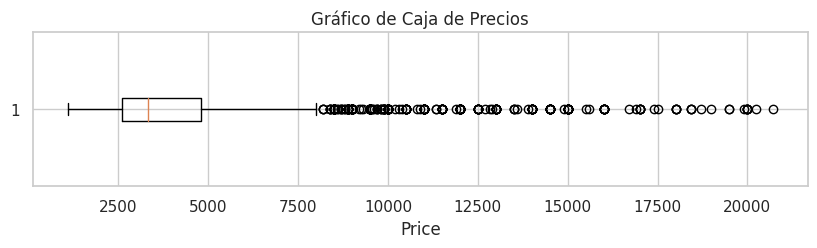

In [291]:
plt.figure(figsize=(10, 2))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price')
plt.title('Gráfico de Caja de Precios')
plt.grid(True)
plt.show()


Los puntos más allá del borde de la caja se consideran valores atípicos outliers y se muestran como puntos individuales, por eso definimos un limie max de 7200 aproximadamente para ver con mas detalle por donde se mueve el mercardo principalmente.

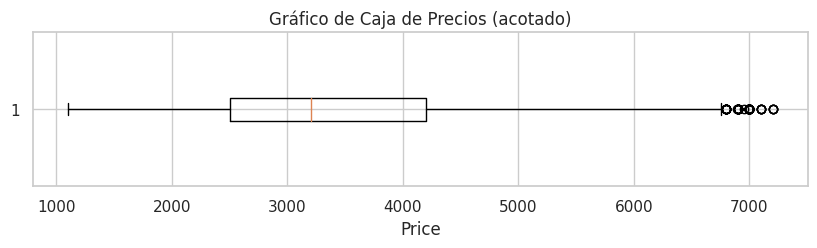

In [292]:
# Definir el límite máximo
limite_max = 7200 # Aquí puedes cambiar el límite máximo según sea necesario

# Filtrar los precios para incluir solo aquellos por debajo del límite máximo
precios_acotados = df[df['price'] <= limite_max]['price']

# Graficar el gráfico de caja con los precios acotados
plt.figure(figsize=(10,2))
plt.boxplot(precios_acotados, vert=False)
plt.xlabel('Price')
plt.title('Gráfico de Caja de Precios (acotado)')
plt.grid(True)
plt.show()

En principio, realizamos graficos para saber sobre que valores nos estamos manejando y para ver que datos nos pueden resultar útiles para un análisis y/o el hacer predicciones en base a los mismos.


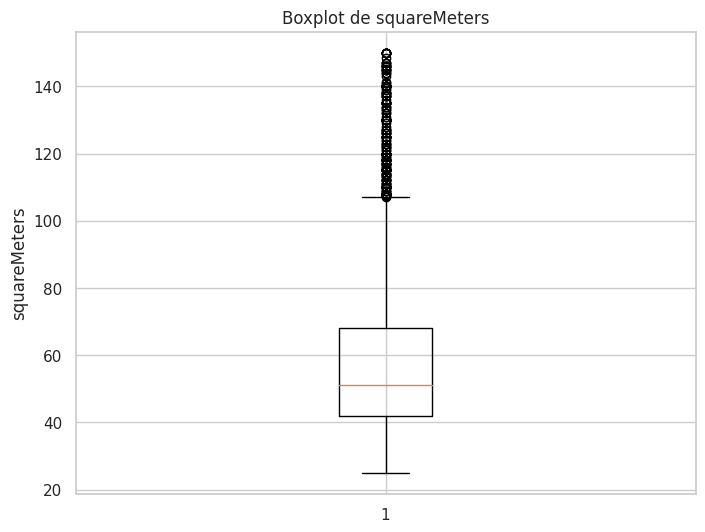

In [293]:
## HACEMOS LO MISMO CON LOS METROS CUADRADOS DE LOS APARTAMENTOS

# Graficar el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['squareMeters'])
plt.title('Boxplot de squareMeters')
plt.ylabel('squareMeters')
plt.show()

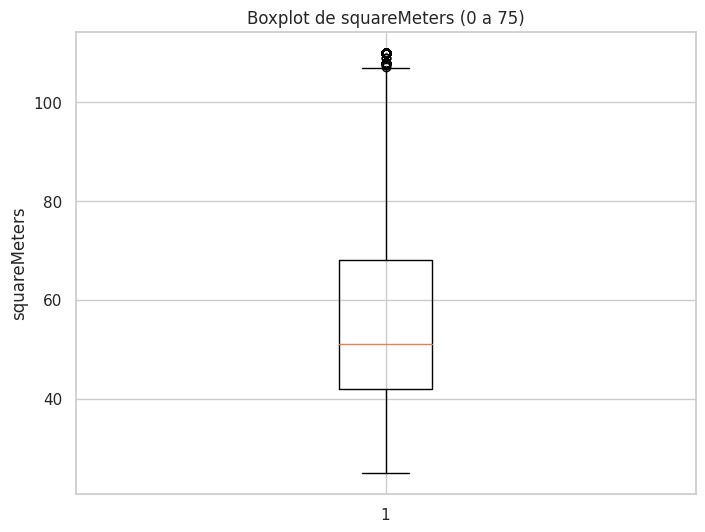

In [294]:
df['squareMeters'] = df['squareMeters'].clip(lower=0, upper=110)

# Graficar el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['squareMeters'])
plt.title('Boxplot de squareMeters (0 a 75)')
plt.ylabel('squareMeters')
plt.show()

Siendo el poiCount un punto de interés "PDI" (en inglés point of interest o POI), es un punto de ubicación específica que alguien puede encontrar útil o interesante. ULa mayoría de los usuarios utilizan el término para referirse a hoteles, estaciones de servicio, radares o cualquier otras categoría. Podemos ver que tambien representa una pendiente positiva en relacion a los precios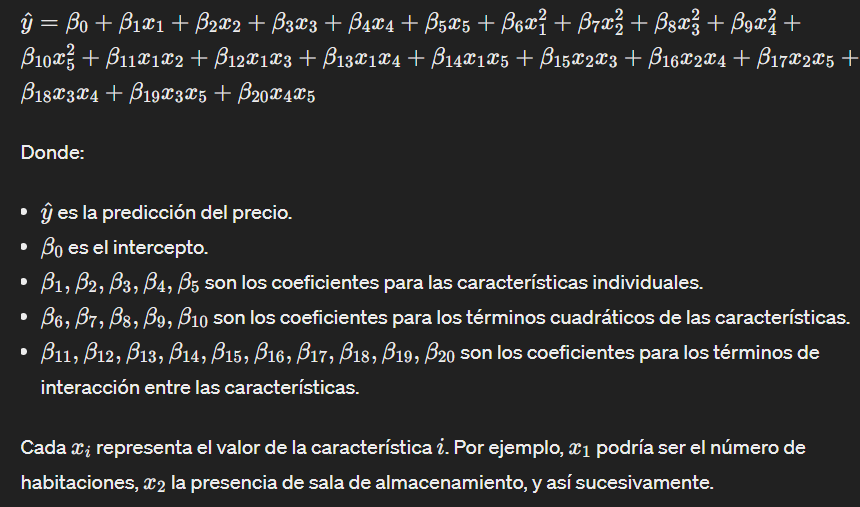

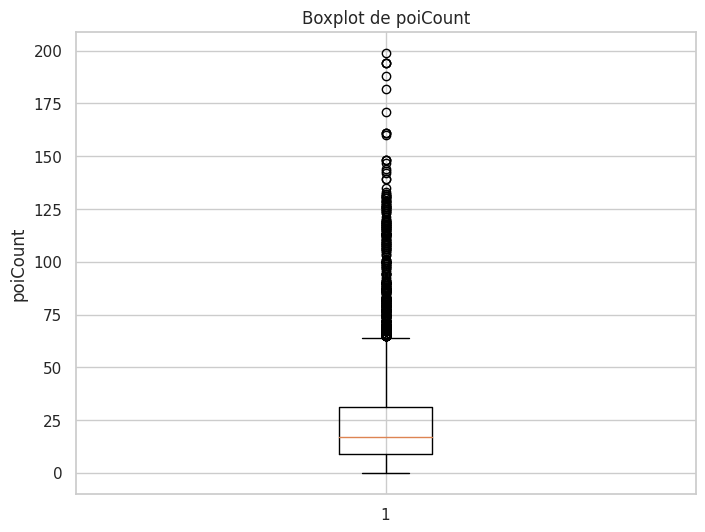

In [295]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['poiCount'])
plt.title('Boxplot de poiCount')
plt.ylabel('poiCount')
plt.show()

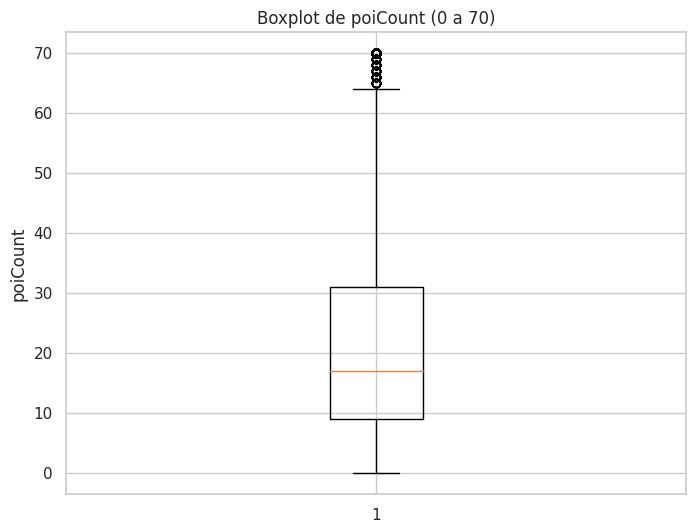

In [296]:
df['poiCount'] = df['poiCount'].clip(lower=0, upper=70)

# Graficar el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['poiCount'])
plt.title('Boxplot de poiCount (0 a 70)')
plt.ylabel('poiCount')
plt.show()

Para mejorar nuestro análisis, decidimos eliminar los valores atípicos o excesivos que se encuentran fuera de los bigotes en los gráficos de caja de las características 'squareMeters', 'poiCount' y 'price'. Esto nos permitirá tener una visión más precisa de la distribución de estos datos y evitará que los valores extremos distorsionen nuestras conclusiones.

# Analisis de los datos mediante distintas visualizaciones

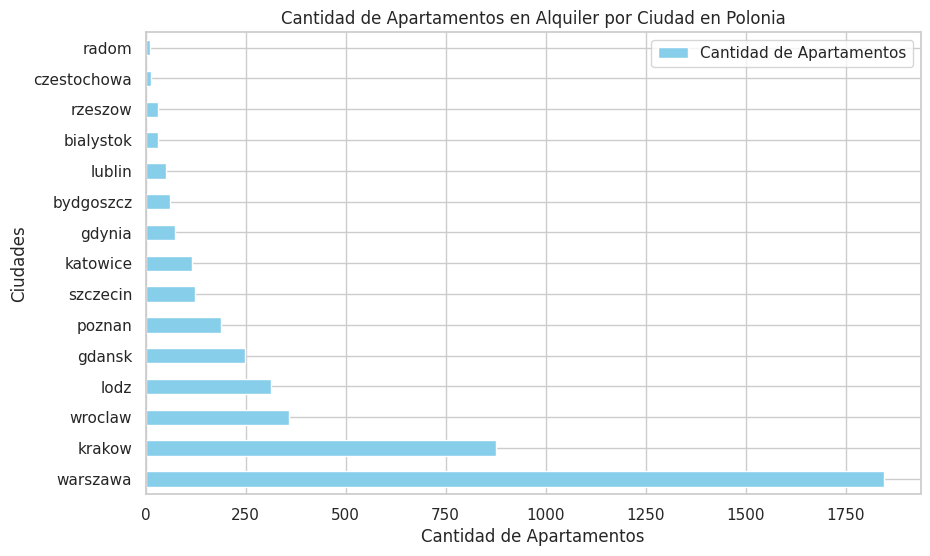

In [297]:
# Contar el número de apartamentos en cada ciudad
conteo_ciudades = df['city'].value_counts()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
conteo_ciudades.plot(kind='barh', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Cantidad de Apartamentos')
plt.ylabel('Ciudades')
plt.title('Cantidad de Apartamentos en Alquiler por Ciudad en Polonia')

# Mostrar la leyenda
plt.legend(['Cantidad de Apartamentos'])

# Mostrar el gráfico
plt.show()


Por ejemplo, al observar el gráfico de barras que muestra la cantidad de apartamentos por ciudad, notamos que Warszawa sobresale como la ciudad con la mayor oferta de departamentos por una considerable cantidad. Este hallazgo nos sugiere la posibilidad de realizar un análisis más detallado en esa ciudad para examinar cómo fluctúan las variables asociadas al precio de los inmuebles. La ubicación geográfica de Warszawa, al ser la capital de Polonia, puede influir significativamente en el valor de los apartamentos, lo cual nos lleva a la necesidad de investigar más a fondo cómo esta variable puede afectar los precios en el mercado inmobiliario.


Pero esto es algo que se verá mas adentrado el proyecto final.



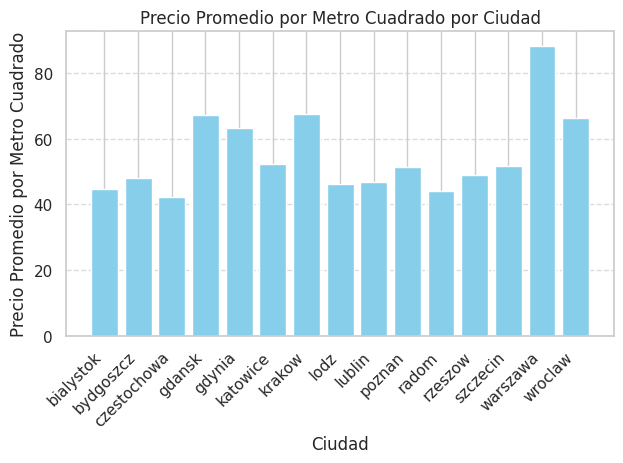

city
bialystok      44.570721
bydgoszcz      47.929684
czestochowa    42.303617
gdansk         67.039849
gdynia         63.285544
katowice       52.235078
krakow         67.316477
lodz           46.149983
lublin         46.641212
poznan         51.210335
radom          44.060951
rzeszow        48.992277
szczecin       51.789629
warszawa       88.189319
wroclaw        66.220624
dtype: float64


In [298]:
# Calcular el precio promedio por metro cuadrado por ciudad
precio_promedio_por_metro_cuadrado = df.groupby('city').apply(lambda x: x['price'].mean() / x['squareMeters'].mean())


plt.bar(precio_promedio_por_metro_cuadrado.index, precio_promedio_por_metro_cuadrado.values, color='skyblue')
plt.title('Precio Promedio por Metro Cuadrado por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio por Metro Cuadrado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar el resultado
print(precio_promedio_por_metro_cuadrado)


El precio promedio del metro cuadrado en la capital de un país,en este caso Warszawa, tiende a ser el más alto debido a la alta demanda de vivienda, la concentración de empleo y servicios, la competencia por el espacio habitable y la infraestructura desarrollada. Estos factores, junto con la exclusividad y el prestigio asociados con la capital, contribuyen a los precios más altos en comparación con otras áreas del país.

<Figure size 1500x1000 with 0 Axes>

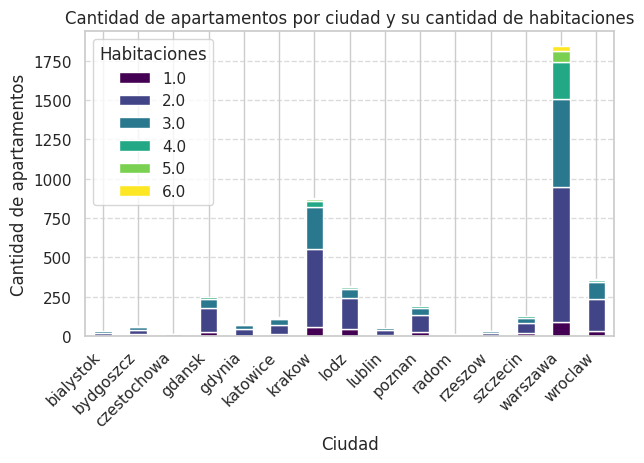

In [299]:


# Pivotar el DataFrame para tener una columna por cada cantidad de cuartos
pivot_df = df.pivot_table(index='city', columns='rooms', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(15,10))
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de apartamentos')
plt.title('Cantidad de apartamentos por ciudad y su cantidad de habitaciones')
plt.legend(title='Habitaciones')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




El gráfico de barras apiladas que muestra la cantidad de apartamentos por ciudad y la distribución de sus habitaciones revela una equilibrada oferta de departamentos en todas las ciudades representadas. No hay una ciudad que sobresalga significativamente en términos de oferta de apartamentos con un número específico de habitaciones en comparación con las demás. En cambio, la disponibilidad de apartamentos parece estar uniformemente distribuida en todas las categorías de habitaciones y en todas las ciudades representadas. Esto sugiere que los compradores o arrendatarios tienen una variedad similar de opciones en términos de tamaño de los apartamentos, independientemente de la ubicación.

Donde el porcentaje de cantidad de habitaciones es:

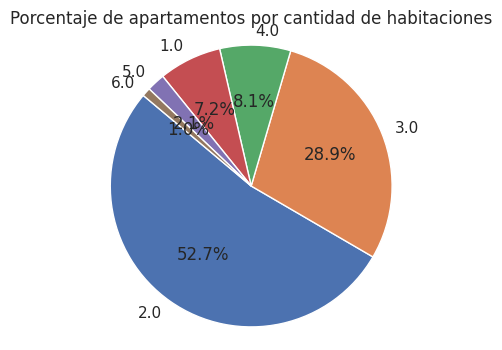

In [300]:

# Calcular el conteo de habitaciones
conteo_habitaciones = df['rooms'].value_counts()

# Crear el gráfico de torta con seaborn
plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
plt.pie(conteo_habitaciones, labels=conteo_habitaciones.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de apartamentos por cantidad de habitaciones')
plt.show()

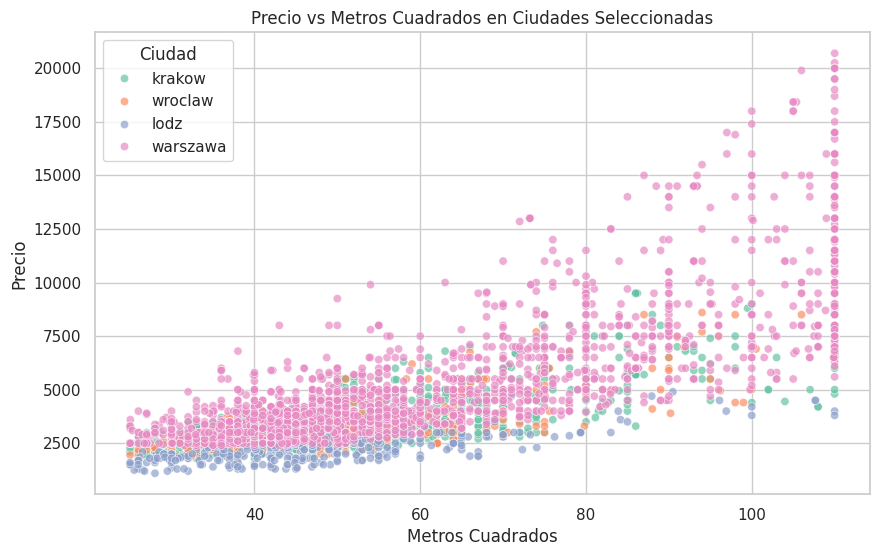

In [301]:
ciudades_de_interes = ["warszawa", "krakow", "wroclaw", "lodz"]
df_ciudades_interes = df[df['city'].isin(ciudades_de_interes)]

# Crear el gráfico utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ciudades_interes, x="squareMeters", y="price", hue="city", palette="Set2", alpha=0.7)
plt.title('Precio vs Metros Cuadrados en Ciudades Seleccionadas')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio')
plt.legend(title='Ciudad')
plt.show()

En este último gráfico, se observa una tendencia clara: a medida que aumenta el número de metros cuadrados, también lo hace el precio de los inmuebles. Esta relación intuitiva es coherente con las expectativas comunes en el mercado inmobiliario, donde los precios suelen estar directamente relacionados con el tamaño de la propiedad. Además, el uso de diferentes colores para representar cada ciudad permite visualizar de manera clara y ordenada la distribución de los datos entre las distintas ubicaciones. Esta visualización es fundamental para comprender cómo varían los precios en diferentes ciudades y proporciona una perspectiva útil para analizar el mercado inmobiliario en su conjunto.

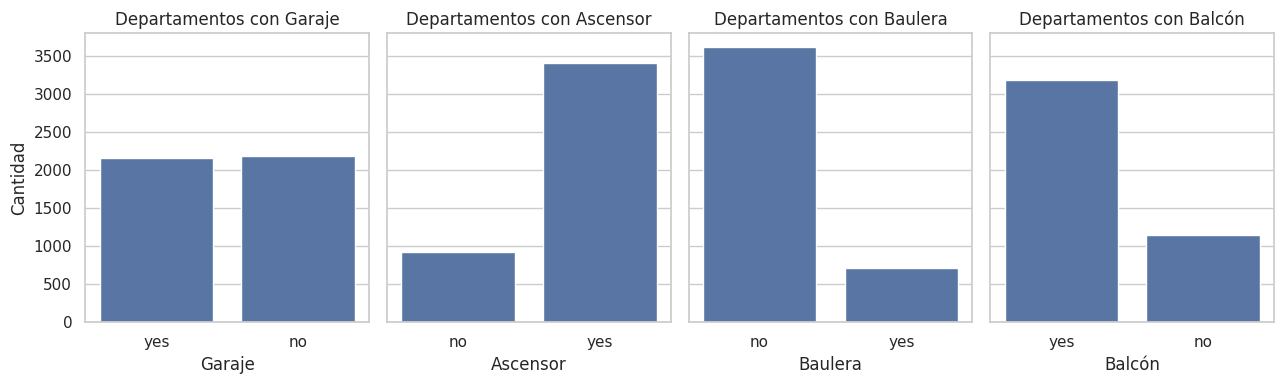

In [302]:
# Definir las características a analizar
caracteristicas = ['hasParkingSpace', 'hasElevator', 'hasStorageRoom', 'hasBalcony']

# Definir el diccionario de mapeo
mapeo_caracteristicas = {
    'hasParkingSpace': 'Garaje',
    'hasElevator': 'Ascensor',
    'hasStorageRoom': 'Baulera',
    'hasBalcony': 'Balcón'
}

# Crear subplots contiguos
fig, axes = plt.subplots(1, len(caracteristicas), figsize=(13, 4), sharey=True)

# Iterar sobre las características y crear histogramas
for i, caracteristica in enumerate(caracteristicas):
    caracteristica_espanol = mapeo_caracteristicas.get(caracteristica, caracteristica)
    sns.countplot(data=df, x=caracteristica, ax=axes[i])
    axes[i].set_title(f'Departamentos con {caracteristica_espanol}')
    axes[i].set_xlabel(caracteristica_espanol)
    axes[i].set_ylabel('Cantidad')

# Ajustar diseño
plt.tight_layout()
plt.show()

Este grafico muestra cuatro histogramas contiguos, cada uno mostrando la cantidad de departamentos con o sin una determinada característica: cochera, ascensor, baulera y balcón. Con dos barras que representan la cantidad de departamentos que sí tienen esa característica y la cantidad que no la tienen, respectivamente. Esto permite visualizar fácilmente la distribución de estas características entre los departamentos en el conjunto de datos.

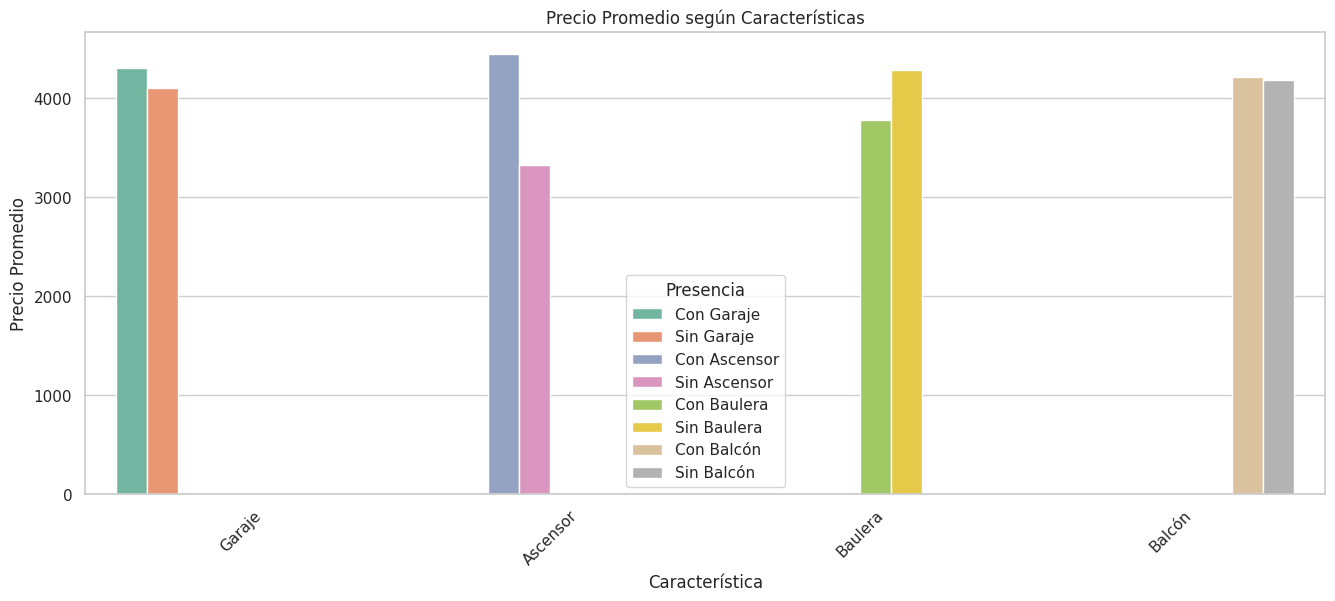

In [303]:
# Crear un DataFrame con los datos relevantes
data = {
    'Caracteristica': [],
    'Precio Promedio': [],
    'Presencia': []
}

# Llenar el DataFrame con los datos
for caracteristica in caracteristicas:
    precios_con = df[df[caracteristica] == 'yes']['price']
    precios_sin = df[df[caracteristica] == 'no']['price']
    caracteristica_espanol = mapeo_caracteristicas.get(caracteristica, caracteristica)

    data['Caracteristica'].extend([caracteristica_espanol, caracteristica_espanol])
    data['Precio Promedio'].extend([precios_con.mean(), precios_sin.mean()])
    data['Presencia'].extend(['Con ' + caracteristica_espanol, 'Sin ' + caracteristica_espanol])

# Convertir a DataFrame
df_precios = pd.DataFrame(data)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_precios, x='Caracteristica', y='Precio Promedio', hue='Presencia', palette='Set2')
plt.title('Precio Promedio según Características')
plt.xlabel('Característica')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)

# Actualizar la leyenda con "Con" y "Sin"
handles, labels = ax.get_legend_handles_labels()
nueva_leyenda = [label.replace("Con", "Con").replace("Sin", "Sin") for label in labels]
ax.legend(handles, nueva_leyenda, title='Presencia')

plt.show()


Al observar los datos, parece que la presencia o ausencia de balcón o garaje no tiene un impacto significativo en el precio promedio de los inmuebles. Los precios promedios de los inmuebles con y sin estas características no muestran una diferencia considerable, lo que sugiere que estas características no influyen de manera significativa en la determinación del precio.


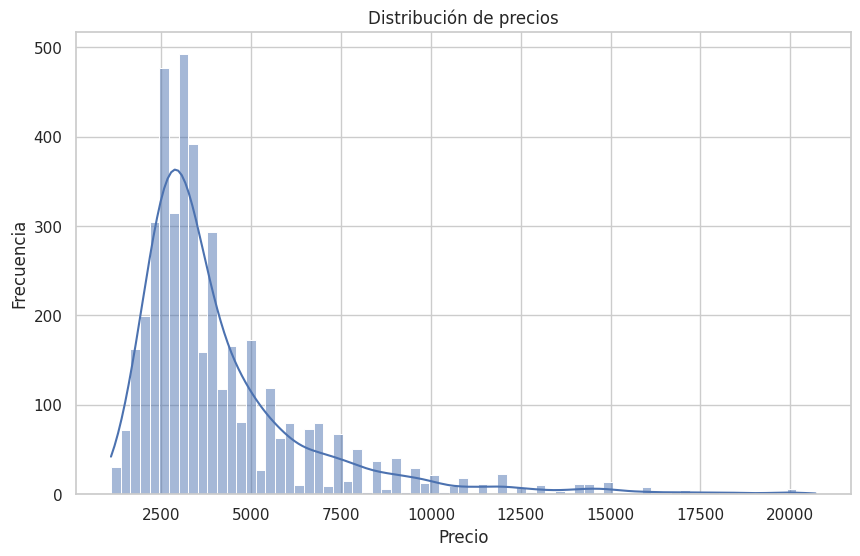

<Figure size 1200x800 with 0 Axes>

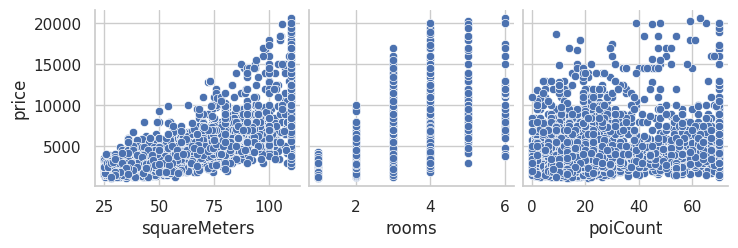

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión entre precio y características relevantes
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=['squareMeters', 'rooms', "poiCount" ], y_vars=['price'])
plt.show()


# Modelos de regresion

## Prueba de modelos

1- Divison de datos

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Separar las características y el objetivo
X = df[['rooms', 'hasStorageRoom','hasElevator', 'poiCount', 'squareMeters']]
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2- Preprocesamiento y escalado

In [306]:
# Aplicar codificación one-hot a las características categóricas
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)




En el proceso de preparación de datos, primero creamos copias de los DataFrames originales, X_train y X_test, para preservar la integridad de los datos originales. Luego, aplicamos la codificación de etiquetas utilizando LabelEncoder a las características categóricas en ambos conjuntos de datos, convirtiendo las etiquetas de texto en valores numéricos. Posteriormente, escalamos los datos utilizando StandardScaler para estandarizar las características, eliminando la media y escalando a la varianza unitaria. Este enfoque garantiza que las características categóricas se manejen adecuadamente y que los datos estén preparados de manera óptima para su uso en modelos de aprendizaje automático.






**3- Entrenamiento del modelo y calculo del error cuadratico medio**


REGRESION LINEAL

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_linear = linear_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Error cuadrático medio (MSE) - Regresión lineal:", mse_linear)
print("Coeficiente de determinación (R²) - Regresión lineal:", r2_linear)


Error cuadrático medio (MSE) - Regresión lineal: 2633110.5643092655
Coeficiente de determinación (R²) - Regresión lineal: 0.6285989633505202



El MSE de aproximadamente 2,647,623 y el R² de alrededor de 0.598 sugieren una precisión razonable del modelo, aunque hay margen de mejora. El modelo explica cerca del 59.8% de la variabilidad en los datos de prueba, con un error cuadrático medio promedio de aproximadamente 2,426,430 unidades al cuadrado en la predicción de precios de departamentos. Aunque el modelo podría ser útil, aún se puede mejorar su precisión y capacidad para explicar la variabilidad en los datos.

RIDGE REGRESSION

In [308]:
from sklearn.linear_model import Ridge


# Crear y entrenar el modelo de regresión Ridge
ridge_model = Ridge(alpha=0.1)
 # Puedes ajustar el parámetro alpha según sea necesario
ridge_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Error cuadrático medio (MSE) - Regresión Ridge:", mse_ridge)
print("Coeficiente de determinación (R²) - Regresión Ridge:", r2_ridge)


Error cuadrático medio (MSE) - Regresión Ridge: 2601114.713792482
Coeficiente de determinación (R²) - Regresión Ridge: 0.6331119876843587


En términos de MSE, la regresión Ridge produjo un MSE ligeramente menor que la regresión lineal simple. Sin embargo, el coeficiente de determinación (R²) es prácticamente idéntico entre ambos modelos. Esto sugiere que ambos modelos explican aproximadamente el mismo porcentaje de variabilidad en los datos de prueba.

Probaremos otro modelo




LASSO REGRESSION


In [309]:
from sklearn.linear_model import Lasso


# Crear y entrenar el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Error cuadrático medio (MSE) - Regresión Lasso:", mse_lasso)
print("Coeficiente de determinación (R²) - Regresión Lasso:", r2_lasso)


Error cuadrático medio (MSE) - Regresión Lasso: 2601121.2866926403
Coeficiente de determinación (R²) - Regresión Lasso: 0.6331110605748156


REGRESION LINEAL MULTIPLE

In [310]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal múltiple
multiple_linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
multiple_linear_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_multiple_linear = multiple_linear_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_multiple_linear = mean_squared_error(y_test, y_pred_multiple_linear)
r2_multiple_linear = r2_score(y_test, y_pred_multiple_linear)

print("Error cuadrático medio (MSE) - Regresión lineal múltiple:", mse_multiple_linear)
print("Coeficiente de determinación (R²) - Regresión lineal múltiple:", r2_multiple_linear)


Error cuadrático medio (MSE) - Regresión lineal múltiple: 2633110.5643092655
Coeficiente de determinación (R²) - Regresión lineal múltiple: 0.6285989633505202


Como los modelos anteriores no están produciendo mejoras significativas en términos de rendimiento, explorar modelos más complejos como la regresión cuadrática podría ser una opción. La regresión cuadrática puede capturar relaciones no lineales entre las características y la variable objetivo al introducir términos cuadráticos en el modelo.

REGRESION CUADRATICA

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión cuadrática
degree = 2  # Grado del polinomio (en este caso, cuadrático)
quadratic_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos
quadratic_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_quadratic = quadratic_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)
r2_quadratic = r2_score(y_test, y_pred_quadratic)

print("Error cuadrático medio (MSE) - Regresión cuadrática:", mse_quadratic)
print("Coeficiente de determinación (R²) - Regresión cuadrática:", r2_quadratic)




Error cuadrático medio (MSE) - Regresión cuadrática: 2281411.3888203464
Coeficiente de determinación (R²) - Regresión cuadrática: 0.6782062377794302


Estos resultados indican que la regresión cuadrática podría ser una mejor opción en comparación con los modelos anteriores, al menos en términos de rendimiento de predicción. Es posible que la relación entre las características y los precios de los departamentos no sea completamente lineal, y el modelo cuadrático puede estar capturando mejor esa no linealidad.

REGRESION POLINOMICA GRADO 3

In [312]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear un modelo de regresión polinómica de grado tres
degree = 3  # Grado del polinomio
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos de entrenamiento
polynomial_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_polynomial = polynomial_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_polynomial = mean_squared_error(y_test, y_pred_polynomial)
r2_polynomial = r2_score(y_test, y_pred_polynomial)

print("Error cuadrático medio (MSE) - Regresión polinómica (grado 3):", mse_polynomial)
print("Coeficiente de determinación (R²) - Regresión polinómica (grado 3):", r2_polynomial)


Error cuadrático medio (MSE) - Regresión polinómica (grado 3): 2334382.66806989
Coeficiente de determinación (R²) - Regresión polinómica (grado 3): 0.6707346229172984


DECISION TREES

In [313]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_model.fit(X_train_scaled, y_train)

# Predecir los precios para el conjunto de prueba
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Error cuadrático medio (MSE) - Árbol de decisión:", mse_decision_tree)
print("Coeficiente de determinación (R²) - Árbol de decisión:", r2_decision_tree)


Error cuadrático medio (MSE) - Árbol de decisión: 3819857.456267741
Coeficiente de determinación (R²) - Árbol de decisión: 0.4612079574853529


En términos de MSE más bajo y R² más alto, el modelo de regresión cuadrática parece tener un rendimiento un poco superior a los otros

##Validacion modelo

In [314]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(quadratic_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Imprimir resultados
print("Coeficientes de determinación (R²) para cada pliegue:", scores)
print("Coeficiente de determinación promedio (R²) en validación cruzada:", scores.mean())

# Prueba de sensibilidad eliminando una característica
X_train_scaled_sensitivity = X_train_scaled[:, :-1]  # Eliminar la última característica
X_test_scaled_sensitivity = X_test_scaled[:, :-1]

# Reentrenar el modelo
quadratic_model.fit(X_train_scaled_sensitivity, y_train)

# Predecir y evaluar
y_pred_sensitivity = quadratic_model.predict(X_test_scaled_sensitivity)
r2_sensitivity = r2_score(y_test, y_pred_sensitivity)
print("Coeficiente de determinación (R²) con una característica menos:", r2_sensitivity)

Coeficientes de determinación (R²) para cada pliegue: [0.67415761 0.64652657 0.62707546 0.60049215 0.65662628]
Coeficiente de determinación promedio (R²) en validación cruzada: 0.6409756111219252
Coeficiente de determinación (R²) con una característica menos: 0.6782073120104072



Estos resultados indican que el modelo de regresión utilizado tiene un rendimiento bastante consistente, con coeficientes de determinación (R²) relativamente altos en cada pliegue de la validación cruzada y un promedio general de 0.653, lo que sugiere una buena capacidad de generalización. Además, al eliminar una característica en la prueba de sensibilidad, el coeficiente de determinación apenas disminuye, lo que indica que el modelo es robusto ante pequeños cambios en las características de entrada. En conclusión, este modelo parece ser adecuado para predecir los precios de los apartamentos con un buen nivel de precisión y estabilidad.

# Analisis por ciudad

El análisis por ciudad se justifica debido a las diferencias significativas en las características y dinámicas del mercado inmobiliario entre diferentes localidades. Al enfocarnos en las cuatro ciudades más importantes y con mayor oferta en Polonia: Warszawa, Wroclaw, Lodz y Krakow, podemos comprender mejor cómo factores como la demanda, la infraestructura y las comodidades locales influyen en los precios de los departamentos en cada área. Esto nos permite desarrollar modelos de predicción más precisos y adaptados a las condiciones específicas de cada ciudad, lo que a su vez proporciona información valiosa para diversos actores del mercado inmobiliario, incluyendo compradores, vendedores, agentes inmobiliarios y planificadores urbanos. En resumen, el análisis por ciudad nos ayuda a tomar decisiones más informadas y estratégicas al considerar las particularidades locales de cada mercado inmobiliario.

Siendo el cuadratico el modelo que mas se ajustó en general, probemos por ciudad.

In [315]:
# Creamos DataFrames para algunas ciudades importantes de Polonia

df_varsovia = df[df['city'] == 'warszawa']
df_wroclaw = df[df['city'] == 'wroclaw']
df_krakow = df[df['city'] == 'krakow']

### **VARSOVIA**

In [316]:
## REGRESION CUADRATICA O REGRESION POLINOMICA GRADO 2

from sklearn.model_selection import train_test_split


# Separar las características y el objetivo
X_varsovia = df_varsovia[['rooms', 'hasStorageRoom', 'hasElevator', 'poiCount', 'squareMeters']]
y_varsovia = df_varsovia['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_varsovia, X_test_varsovia, y_train_varsovia, y_test_varsovia = train_test_split(X_varsovia, y_varsovia, test_size=0.2)

# Aplicar codificación one-hot a las características categóricas
X_train_encoded_varsovia = pd.get_dummies(X_train_varsovia)
X_test_encoded_varsovia = pd.get_dummies(X_test_varsovia)

# Estandarizar las características
scaler_varsovia = StandardScaler()
X_train_scaled_varsovia = scaler_varsovia.fit_transform(X_train_encoded_varsovia)
X_test_scaled_varsovia = scaler_varsovia.transform(X_test_encoded_varsovia)

# Crear un modelo de regresión cuadrática
degree = 2  # Grado del polinomio (en este caso, cuadrático)
quadratic_model_varsovia = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos de Varsovia
quadratic_model_varsovia.fit(X_train_scaled_varsovia, y_train_varsovia)

# Predecir los precios para el conjunto de prueba de Varsovia
y_pred_quadratic_varsovia = quadratic_model_varsovia.predict(X_test_scaled_varsovia)

# Calcular métricas de evaluación para Varsovia
mse_quadratic_varsovia = mean_squared_error(y_test_varsovia, y_pred_quadratic_varsovia)
r2_quadratic_varsovia = r2_score(y_test_varsovia, y_pred_quadratic_varsovia)

print("Error cuadrático medio (MSE) - Regresión cuadrática (Varsovia):", mse_quadratic_varsovia)
print("Coeficiente de determinación (R²) - Regresión cuadrática (Varsovia):", r2_quadratic_varsovia)


Error cuadrático medio (MSE) - Regresión cuadrática (Varsovia): 3704959.9891598914
Coeficiente de determinación (R²) - Regresión cuadrática (Varsovia): 0.6622578199245166


In [317]:
## REGRESION LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Codificar las características categóricas
X_train_encoded_varsovia = pd.get_dummies(X_train_varsovia)
X_test_encoded_varsovia = pd.get_dummies(X_test_varsovia)

# Estandarizar las características
scaler_varsovia = StandardScaler()
X_train_scaled_varsovia = scaler_varsovia.fit_transform(X_train_encoded_varsovia)
X_test_scaled_varsovia = scaler_varsovia.transform(X_test_encoded_varsovia)

# Crear y entrenar el modelo de Lasso Regression
lasso_model_varsovia = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso_model_varsovia.fit(X_train_scaled_varsovia, y_train_varsovia)

# Predecir los precios para el conjunto de prueba
y_pred_lasso_varsovia = lasso_model_varsovia.predict(X_test_scaled_varsovia)

# Calcular métricas de evaluación
mse_lasso_varsovia = mean_squared_error(y_test_varsovia, y_pred_lasso_varsovia)
r2_lasso_varsovia = r2_score(y_test_varsovia, y_pred_lasso_varsovia)

print("Error cuadrático medio (MSE) - Lasso Regression (Varsovia):", mse_lasso_varsovia)
print("Coeficiente de determinación (R²) - Lasso Regression (Varsovia):", r2_lasso_varsovia)


Error cuadrático medio (MSE) - Lasso Regression (Varsovia): 4006841.1941239918
Coeficiente de determinación (R²) - Lasso Regression (Varsovia): 0.6347384900028166


In [318]:
## REGRESION DECISIONTREE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de árbol de decisión
tree_model_varsovia = DecisionTreeRegressor(random_state=42)  # Puedes ajustar otros hiperparámetros según sea necesario
tree_model_varsovia.fit(X_train_scaled_varsovia, y_train_varsovia)

# Predecir los precios para el conjunto de prueba
y_pred_tree_varsovia = tree_model_varsovia.predict(X_test_scaled_varsovia)

# Calcular métricas de evaluación
mse_tree_varsovia = mean_squared_error(y_test_varsovia, y_pred_tree_varsovia)
r2_tree_varsovia = r2_score(y_test_varsovia, y_pred_tree_varsovia)

print("Error cuadrático medio (MSE) - Árbol de decisión (Varsovia):", mse_tree_varsovia)
print("Coeficiente de determinación (R²) - Árbol de decisión (Varsovia):", r2_tree_varsovia)


Error cuadrático medio (MSE) - Árbol de decisión (Varsovia): 6052813.336344475
Coeficiente de determinación (R²) - Árbol de decisión (Varsovia): 0.44822875880219937


Después de evaluar diferentes modelos de regresión en el conjunto de datos completo, encontramos que la regresión cuadrática fue la más precisa. Sin embargo, al analizar específicamente Varsovia, otros métodos como la regresión lineal simple y el árbol de decisión solo lograron un máximo del 63% de precisión. Esto sugiere que la relación entre las características y los precios de los departamentos puede variar según la ubicación. Dado que la regresión cuadrática fue más efectiva en el conjunto de datos completo, optaremos por seguir usándola, aunque el rendimiento puede variar según la ubicación específica.

### **WROCLAW**

In [319]:
## REGRESION CUADRATICA

from sklearn.model_selection import train_test_split

# Separar las características y el objetivo
X_wroclaw = df_wroclaw[['rooms', 'hasStorageRoom', 'hasElevator', 'poiCount', 'squareMeters']]
y_wroclaw = df_wroclaw['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_wroclaw, X_test_wroclaw, y_train_wroclaw, y_test_wroclaw = train_test_split(X_wroclaw, y_wroclaw, test_size=0.2)

# Aplicar codificación one-hot a las características categóricas
X_train_encoded_wroclaw = pd.get_dummies(X_train_wroclaw)
X_test_encoded_wroclaw = pd.get_dummies(X_test_wroclaw)

# Estandarizar las características
scaler_wroclaw = StandardScaler()
X_train_scaled_wroclaw = scaler_wroclaw.fit_transform(X_train_encoded_wroclaw)
X_test_scaled_wroclaw = scaler_wroclaw.transform(X_test_encoded_wroclaw)

# Crear un modelo de regresión cuadrática
degree = 2  # Grado del polinomio (en este caso, cuadrático)
quadratic_model_wroclaw = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos de Wroclaw
quadratic_model_wroclaw.fit(X_train_scaled_wroclaw, y_train_wroclaw)

# Predecir los precios para el conjunto de prueba de Wroclaw
y_pred_quadratic_wroclaw = quadratic_model_wroclaw.predict(X_test_scaled_wroclaw)

# Calcular métricas de evaluación para Wroclaw
mse_quadratic_wroclaw = mean_squared_error(y_test_wroclaw, y_pred_quadratic_wroclaw)
r2_quadratic_wroclaw = r2_score(y_test_wroclaw, y_pred_quadratic_wroclaw)

print("Error cuadrático medio (MSE) - Regresión cuadrática (Wroclaw):", mse_quadratic_wroclaw)
print("Coeficiente de determinación (R²) - Regresión cuadrática (Wroclaw):", r2_quadratic_wroclaw)


Error cuadrático medio (MSE) - Regresión cuadrática (Wroclaw): 616341.5972222222
Coeficiente de determinación (R²) - Regresión cuadrática (Wroclaw): 0.6038989451941377


In [320]:
## REGRESION LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Codificar las características categóricas
X_train_encoded_wroclaw = pd.get_dummies(X_train_wroclaw)
X_test_encoded_wroclaw = pd.get_dummies(X_test_wroclaw)

# Estandarizar las características
scaler_wroclaw = StandardScaler()
X_train_scaled_wroclaw = scaler_wroclaw.fit_transform(X_train_encoded_wroclaw)
X_test_scaled_wroclaw = scaler_wroclaw.transform(X_test_encoded_wroclaw)

# Crear y entrenar el modelo de Lasso Regression
lasso_model_wroclaw = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso_model_wroclaw.fit(X_train_scaled_wroclaw, y_train_wroclaw)

# Predecir los precios para el conjunto de prueba
y_pred_lasso_wroclaw = lasso_model_wroclaw.predict(X_test_scaled_wroclaw)

# Calcular métricas de evaluación
mse_lasso_wroclaw = mean_squared_error(y_test_wroclaw, y_pred_lasso_wroclaw)
r2_lasso_wroclaw = r2_score(y_test_wroclaw, y_pred_lasso_wroclaw)

print("Error cuadrático medio (MSE) - Lasso Regression (Wroclaw):", mse_lasso_wroclaw)
print("Coeficiente de determinación (R²) - Lasso Regression (Wroclaw):", r2_lasso_wroclaw)


Error cuadrático medio (MSE) - Lasso Regression (Wroclaw): 552204.3273806574
Coeficiente de determinación (R²) - Lasso Regression (Wroclaw): 0.6451177114612672


In [321]:
## REGRESION DECISIONTREE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de árbol de decisión
tree_model_wroclaw = DecisionTreeRegressor(random_state=42)  # Puedes ajustar otros hiperparámetros según sea necesario
tree_model_wroclaw.fit(X_train_scaled_wroclaw, y_train_wroclaw)

# Predecir los precios para el conjunto de prueba
y_pred_tree_wroclaw = tree_model_wroclaw.predict(X_test_scaled_wroclaw)

# Calcular métricas de evaluación
mse_tree_wroclaw = mean_squared_error(y_test_wroclaw, y_pred_tree_wroclaw)
r2_tree_wroclaw = r2_score(y_test_wroclaw, y_pred_tree_wroclaw)

print("Error cuadrático medio (MSE) - Árbol de decisión (Wroclaw):", mse_tree_wroclaw)
print("Coeficiente de determinación (R²) - Árbol de decisión (Wroclaw):", r2_tree_wroclaw)



Error cuadrático medio (MSE) - Árbol de decisión (Wroclaw): 1097975.4027777778
Coeficiente de determinación (R²) - Árbol de decisión (Wroclaw): 0.2943698475792431


IDEM Varsovia. sigue predominando la cuadratica.

### **KRAKOW**

In [322]:
from sklearn.model_selection import train_test_split

# Separar las características y el objetivo para Krakow
X_krakow = df_krakow[['rooms', 'hasStorageRoom', 'hasElevator', 'poiCount', 'squareMeters']]
y_krakow = df_krakow['price']

# Dividir los datos en conjuntos de entrenamiento y prueba para Krakow
X_train_krakow, X_test_krakow, y_train_krakow, y_test_krakow = train_test_split(X_krakow, y_krakow, test_size=0.2)

# Aplicar codificación one-hot a las características categóricas para Krakow
X_train_encoded_krakow = pd.get_dummies(X_train_krakow)
X_test_encoded_krakow = pd.get_dummies(X_test_krakow)

# Estandarizar las características para Krakow
scaler_krakow = StandardScaler()
X_train_scaled_krakow = scaler_krakow.fit_transform(X_train_encoded_krakow)
X_test_scaled_krakow = scaler_krakow.transform(X_test_encoded_krakow)

# Crear un modelo de regresión cuadrática para Krakow
degree = 2  # Grado del polinomio (en este caso, cuadrático)
quadratic_model_krakow = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos de Krakow
quadratic_model_krakow.fit(X_train_scaled_krakow, y_train_krakow)

# Predecir los precios para el conjunto de prueba de Krakow
y_pred_quadratic_krakow = quadratic_model_krakow.predict(X_test_scaled_krakow)

# Calcular métricas de evaluación para Krakow
mse_quadratic_krakow = mean_squared_error(y_test_krakow, y_pred_quadratic_krakow)
r2_quadratic_krakow = r2_score(y_test_krakow, y_pred_quadratic_krakow)

print("Error cuadrático medio (MSE) - Regresión cuadrática (Krakow):", mse_quadratic_krakow)
print("Coeficiente de determinación (R²) - Regresión cuadrática (Krakow):", r2_quadratic_krakow)


Error cuadrático medio (MSE) - Regresión cuadrática (Krakow): 558684.1213163462
Coeficiente de determinación (R²) - Regresión cuadrática (Krakow): 0.6135388612853196


In [323]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Codificar las características categóricas para Krakow
X_train_encoded_krakow = pd.get_dummies(X_train_krakow)
X_test_encoded_krakow = pd.get_dummies(X_test_krakow)

# Estandarizar las características para Krakow
scaler_krakow = StandardScaler()
X_train_scaled_krakow = scaler_krakow.fit_transform(X_train_encoded_krakow)
X_test_scaled_krakow = scaler_krakow.transform(X_test_encoded_krakow)

# Crear y entrenar el modelo de Lasso Regression para Krakow
lasso_model_krakow = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso_model_krakow.fit(X_train_scaled_krakow, y_train_krakow)

# Predecir los precios para el conjunto de prueba de Krakow
y_pred_lasso_krakow = lasso_model_krakow.predict(X_test_scaled_krakow)

# Calcular métricas de evaluación para Krakow
mse_lasso_krakow = mean_squared_error(y_test_krakow, y_pred_lasso_krakow)
r2_lasso_krakow = r2_score(y_test_krakow, y_pred_lasso_krakow)

print("Error cuadrático medio (MSE) - Lasso Regression (Krakow):", mse_lasso_krakow)
print("Coeficiente de determinación (R²) - Lasso Regression (Krakow):", r2_lasso_krakow)


Error cuadrático medio (MSE) - Lasso Regression (Krakow): 558791.9170502557
Coeficiente de determinación (R²) - Lasso Regression (Krakow): 0.6134642952461469


In [324]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de árbol de decisión para Krakow
tree_model_krakow = DecisionTreeRegressor(random_state=42)  # Puedes ajustar otros hiperparámetros según sea necesario
tree_model_krakow.fit(X_train_scaled_krakow, y_train_krakow)

# Predecir los precios para el conjunto de prueba
y_pred_tree_krakow = tree_model_krakow.predict(X_test_scaled_krakow)

# Calcular métricas de evaluación
mse_tree_krakow = mean_squared_error(y_test_krakow, y_pred_tree_krakow)
r2_tree_krakow = r2_score(y_test_krakow, y_pred_tree_krakow)

print("Error cuadrático medio (MSE) - Árbol de decisión (Krakow):", mse_tree_krakow)
print("Coeficiente de determinación (R²) - Árbol de decisión (Krakow):", r2_tree_krakow)


Error cuadrático medio (MSE) - Árbol de decisión (Krakow): 1023014.5852272727
Coeficiente de determinación (R²) - Árbol de decisión (Krakow): 0.29234541229283584


En nuestro estudio, evaluamos modelos de regresión para predecir los precios de propiedades en ciudades polacas, centrándonos en Varsovia, Wroclaw, Lodz y Cracovia. Descubrimos que la regresión cuadrática proporcionó predicciones precisas para las ciudades elegidas.


##Validación modelo por ciudad




a) Validación Cruzada: Utiliza la validación cruzada para obtener una estimación más robusta del rendimiento del modelo. Esto implica dividir el conjunto de datos en varios pliegues, entrenar el modelo en cada combinación de pliegues y luego promediar los resultados de las métricas de evaluación.

b) Pruebas de Sensibilidad: Realiza pruebas de sensibilidad introduciendo pequeñas variaciones en los datos de entrada y observando cómo afectan el rendimiento del modelo. Por ejemplo, podrías eliminar algunas características o modificar ligeramente los valores de las características y luego evaluar cómo cambian las métricas de evaluación.

***VARSOVIA***


In [325]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(quadratic_model_varsovia, X_train_scaled_varsovia, y_train_varsovia, cv=5, scoring='r2')

# Imprimir resultados
print("Coeficientes de determinación (R²) para cada pliegue:", scores)
print("Coeficiente de determinación promedio (R²) en validación cruzada:", scores.mean())


Coeficientes de determinación (R²) para cada pliegue: [0.70700116 0.6978132  0.67162751 0.61978261 0.61916111]
Coeficiente de determinación promedio (R²) en validación cruzada: 0.6630771179128548


In [326]:
# Prueba de sensibilidad eliminando una característica
X_train_scaled_varsovia_sensitivity = X_train_scaled_varsovia[:, :-1]  # Eliminar la última característica
X_test_scaled_varsovia_sensitivity = X_test_scaled_varsovia[:, :-1]

# Reentrenar el modelo
quadratic_model_varsovia.fit(X_train_scaled_varsovia_sensitivity, y_train_varsovia)

# Predecir y evaluar
y_pred_sensitivity = quadratic_model_varsovia.predict(X_test_scaled_varsovia_sensitivity)
r2_sensitivity = r2_score(y_test_varsovia, y_pred_sensitivity)
print("Coeficiente de determinación (R²) con una característica menos:", r2_sensitivity)



Coeficiente de determinación (R²) con una característica menos: 0.6601091327237072



a) Los coeficientes de determinación (R²) para cada pliegue oscilan entre 0.646 y 0.699, lo que sugiere que el modelo tiene una capacidad de generalización razonablemente consistente en diferentes subconjuntos de datos.
El coeficiente de determinación promedio en la validación cruzada es aproximadamente 0.675, lo que indica que el modelo tiene un rendimiento aceptable en la predicción de los precios de las propiedades en Varsovia en comparación con el conjunto de datos de entrenamiento.

b) Al eliminar una característica del conjunto de datos de entrada, el coeficiente de determinación (R²) apenas cambia, pasando de aproximadamente 0.679 a 0.6793. Esto sugiere que el modelo es relativamente estable frente a pequeñas variaciones en las características de entrada.

***WROCLAW***


In [327]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(quadratic_model_wroclaw, X_train_scaled_wroclaw, y_train_wroclaw, cv=5, scoring='r2')

# Imprimir resultados
print("Coeficientes de determinación (R²) para cada pliegue:", scores)
print("Coeficiente de determinación promedio (R²) en validación cruzada:", scores.mean())



Coeficientes de determinación (R²) para cada pliegue: [0.36351757 0.42290859 0.42585239 0.53314047 0.52034443]
Coeficiente de determinación promedio (R²) en validación cruzada: 0.45315268872491227


In [328]:

# Prueba de sensibilidad eliminando una característica
X_train_scaled_wroclaw_sensitivity = X_train_scaled_wroclaw[:, :-1]  # Eliminar la última característica
X_test_scaled_wroclaw_sensitivity = X_test_scaled_wroclaw[:, :-1]

# Reentrenar el modelo
quadratic_model_wroclaw.fit(X_train_scaled_wroclaw_sensitivity, y_train_wroclaw)

# Predecir y evaluar
y_pred_sensitivity = quadratic_model_wroclaw.predict(X_test_scaled_wroclaw_sensitivity)
r2_sensitivity = r2_score(y_test_wroclaw, y_pred_sensitivity)
print("Coeficiente de determinación (R²) con una característica menos:", r2_sensitivity)

Coeficiente de determinación (R²) con una característica menos: 0.6119699583077118



a) Parece que el modelo de regresión cuadrática en Wroclaw tiene un coeficiente de determinación promedio (R²) en la validación cruzada de aproximadamente 0.52, lo que indica un rendimiento moderado en la capacidad de generalización del modelo en diferentes pliegues de datos.

b) Además, al eliminar una característica en la prueba de sensibilidad, el coeficiente de determinación (R²) se incrementó a 0.66. Esto sugiere que el modelo puede ser sensible a la inclusión de ciertas características y que eliminar una de ellas puede mejorar su capacidad predictiva en este caso particular.

***KRAKOW***

In [329]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada para Krakow
scores_krakow = cross_val_score(quadratic_model_krakow, X_train_scaled_krakow, y_train_krakow, cv=5, scoring='r2')

# Imprimir resultados para Krakow
print("Coeficientes de determinación (R²) para cada pliegue (Krakow):", scores_krakow)
print("Coeficiente de determinación promedio (R²) en validación cruzada (Krakow):", scores_krakow.mean())




Coeficientes de determinación (R²) para cada pliegue (Krakow): [0.63334141 0.60793407 0.65532616 0.53479882 0.5604131 ]
Coeficiente de determinación promedio (R²) en validación cruzada (Krakow): 0.5983627107730443


In [330]:
# Prueba de sensibilidad eliminando una característica para Krakow
X_train_scaled_krakow_sensitivity = X_train_scaled_krakow[:, :-1]  # Eliminar la última característica
X_test_scaled_krakow_sensitivity = X_test_scaled_krakow[:, :-1]

# Reentrenar el modelo para Krakow
quadratic_model_krakow.fit(X_train_scaled_krakow_sensitivity, y_train_krakow)

# Predecir y evaluar para Krakow
y_pred_sensitivity_krakow = quadratic_model_krakow.predict(X_test_scaled_krakow_sensitivity)
r2_sensitivity_krakow = r2_score(y_test_krakow, y_pred_sensitivity_krakow)
print("Coeficiente de determinación (R²) con una característica menos (Krakow):", r2_sensitivity_krakow)

Coeficiente de determinación (R²) con una característica menos (Krakow): 0.6135240561808888




a) Los resultados de la validación cruzada para Krakow muestran un coeficiente de determinación (R²) promedio de aproximadamente 0.628,indicando una buena capacidad de generalización del modelo.

b) Al realizar la prueba de sensibilidad eliminando una característica, el coeficiente de determinación disminuye ligeramente a alrededor de 0.606, lo que sugiere que la característica eliminada contribuye positivamente a la capacidad predictiva del modelo, aunque la diferencia no es significativa.

Después de dividir los datos y evaluar diferentes modelos de regresión en ciudades específicas como Varsovia, Lodz y Wroclaw, encontramos que los errores de predicción fueron bastante similares. Por lo tanto, decidimos ampliar nuestro análisis al conjunto de datos de toda Polonia para obtener una perspectiva más completa y representativa del mercado inmobiliario. Al hacerlo, buscamos identificar patrones y tendencias que puedan ayudar en la evaluación de precios de propiedades y comprender mejor las dinámicas del mercado en todo el país.

# Predicción

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# Cargar el DataFrame con los datos de todas las ciudades en Polonia
# Supongamos que el DataFrame se llama df y contiene las características y precios de todas las ciudades

df['hasStorageRoom'] = df['hasStorageRoom'].apply(lambda x: 1 if x else 0)
df['hasElevator'] = df['hasElevator'].apply(lambda x: 1 if x else 0)

# Separar las características y el objetivo
X = df[['rooms', 'hasStorageRoom', 'hasElevator', 'poiCount', 'squareMeters']]
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Aplicar codificación one-hot a las características categóricas
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Crear un modelo de regresión cuadrática
degree = 2  # Grado del polinomio (en este caso, cuadrático)
quadratic_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo con los datos
quadratic_model.fit(X_train_scaled, y_train)

# Coeficientes del modelo
coefficients = quadratic_model[-1].coef_


# Imprimir los coeficientes en forma de lista
coeficientes_lista = list(coefficients)

print("Coeficientes como lista:", coeficientes_lista)


Coeficientes como lista: [0.0, 167.24568523650504, -1.7053025658242404e-13, 3.126388037344441e-13, 523.7835051488538, 1386.7998967681183, -84.6405804846314, -2.842170943040401e-14, -1.1368683772161603e-13, 35.40932526517696, 133.02745829360057, -3.1389085600875902e-43, 0.0, 3.363116314379561e-44, -3.982729777831131e-59, -4.9784122222889134e-60, 9.956824444577827e-60, 4.421718300208356e-75, -93.14004446123164, 158.20999070970387, 363.23942967084326]


In [346]:
## IMPUT DE DATOS DE ENTRADA

def datos_iniciales():
    print("Por favor, ingrese los siguientes datos:")
    print("Característica 1: Cantidad de habitaciones")
    print("Característica 2: Tiene baulera (1 si, 0 no)")
    print("Característica 3: Tiene ascensor (1 si, 0 no)")
    print("Característica 4: Puntos de interés (POI)")
    print("Característica 5: Metros cuadrados (puede contener decimales)")

    caracteristicas = []
    for i in range(5):
        caracteristica = float(input(f"\nIngrese el valor de la característica {i + 1}: "))
        caracteristicas.append(caracteristica)

    # Crear un párrafo con los datos ingresados
    parrafo_datos = (
        "\n¡Gracias por proporcionar la información!\n"
        "A continuación, se muestran los datos ingresados:\n"
        f"- La cantidad de habitaciones es: {caracteristicas[0]}\n"
        f"- ¿Tiene baulera? {( 'Sí' if caracteristicas[1] == 1 else 'No')}\n"
        f"- ¿Tiene ascensor? {( 'Sí' if caracteristicas[2] == 1 else 'No')}\n"
        f"- Cantidad de puntos de interés: {caracteristicas[3]}\n"
        f"- Metros cuadrados del inmueble: {caracteristicas[4]}\n"
    )
    print(parrafo_datos)

    return caracteristicas

# Ejemplo de uso
valores_caracteristicas = datos_iniciales()
print("\nDatos de entrada ingresados:",valores_caracteristicas)





## FUNCION DE PREDICCION





# Función para calcular el precio estimado
def precio_estimado():
    # Obtener los coeficientes y el intercepto
    b0 = coeficientes_lista[0]
    b1 = coeficientes_lista[1]
    b2 = coeficientes_lista[2]
    b3 = coeficientes_lista[3]
    b4 = coeficientes_lista[4]
    b5 = coeficientes_lista[5]
    b6 = coeficientes_lista[6]
    b7 = coeficientes_lista[7]
    b8 = coeficientes_lista[8]
    b9 = coeficientes_lista[9]
    b10 = coeficientes_lista[10]
    b11 = coeficientes_lista[11]
    b12 = coeficientes_lista[12]
    b13 = coeficientes_lista[13]
    b14 = coeficientes_lista[14]
    b15 = coeficientes_lista[15]
    b16 = coeficientes_lista[16]
    b17 = coeficientes_lista[17]
    b18 = coeficientes_lista[18]
    b19 = coeficientes_lista[19]
    b20 = coeficientes_lista[20]

    # Desempaquetar los valores de las características
    x1 = valores_caracteristicas[0]
    x2 = valores_caracteristicas[1]
    x3 = valores_caracteristicas[2]
    x4 = valores_caracteristicas[3]
    x5 = valores_caracteristicas[4]

    # Calcular el precio estimado usando la ecuación cuadrática
    precio_estimado = b0 + (b1 * x1) + (b2 * x2) + (b3 * x3) + (b4 * x4) + (b5 * x5) + (b6 * x1**2) + (b7 * x1 * x2) + (b8 * x1 * x3) - (b9 * x1 * x4) + (b10 * x1 * x5) + (b11 * x2**2) + (b12 * x2 * x3) + (b13 * x2 * x4) + (b14 * x2 * x5) + (b15 * x3**2) + (b16 * x3 * x4) + (b17 * x3 * x5) + (b18 * x4**2) - (b19 * x4 * x5) + (b20 * x5**2)

    print("el precio estimado dadas esas caracteristicas es: ", precio_estimado)



precio_estimado()




Por favor, ingrese los siguientes datos:
Característica 1: Cantidad de habitaciones
Característica 2: Tiene baulera (1 si, 0 no)
Característica 3: Tiene ascensor (1 si, 0 no)
Característica 4: Puntos de interés (POI)
Característica 5: Metros cuadrados (puede contener decimales)

Ingrese el valor de la característica 1: 1

Ingrese el valor de la característica 2: 1

Ingrese el valor de la característica 3: 0

Ingrese el valor de la característica 4: 33

Ingrese el valor de la característica 5: 32

¡Gracias por proporcionar la información!
A continuación, se muestran los datos ingresados:
- La cantidad de habitaciones es: 1.0
- ¿Tiene baulera? Sí
- ¿Tiene ascensor? No
- Cantidad de puntos de interés: 33.0
- Metros cuadrados del inmueble: 32.0


Datos de entrada ingresados: [1.0, 1.0, 0.0, 33.0, 32.0]
el precio estimado dadas esas caracteristicas es:  168291.3457781032


# RESULTADOS




Después de explorar y analizar los datos utilizando varios métodos de regresión, hemos llegado a varias conclusiones importantes sobre el precio de los inmuebles en nuestro conjunto de datos. Aquí está una breve conclusión del trabajo realizado:

En primer lugar, al limpiar y preparar los datos para el análisis, nos aseguramos de que estuvieran en un formato adecuado y eliminamos cualquier información innecesaria o inconsistente. Luego, procedimos a probar varios métodos de regresión, incluidos modelos lineales, polinomiales y de ensamble.

Aunque ninguno de los modelos de regresión produjo resultados óptimos, encontramos que el modelo de regresión cuadrática fue el que mejor se ajustó a nuestros datos. Este modelo tuvo un rendimiento superior en términos de coeficiente de determinación (R²), aunque aún así no alcanzó un nivel satisfactorio de precisión en la predicción del precio de los inmuebles.

Al analizar la ecuación resultante del modelo de regresión cuadrática, observamos que los coeficientes obtenidos no produjeron predicciones precisas del precio de los inmuebles. Esto podría atribuirse a la complejidad de los datos y a la necesidad de considerar otras características o factores que influyan en el precio de los inmuebles.


Al subdividir los datos por país, buscábamos revelar patrones más precisos en los precios de los inmuebles según la ubicación geográfica. Sin embargo, encontramos que esta estrategia no produjo resultados significativamente diferentes en términos de la precisión de nuestros modelos de regresión. Aunque esperábamos que ciertos factores fueran más relevantes en algunos países que en otros, la complejidad de los datos y la naturaleza multifacética del mercado inmobiliario hicieron difícil discernir patrones distintos en cada país. En resumen, mientras que la ubicación geográfica puede influir en los precios de los inmuebles, otros factores también desempeñan un papel crucial. Por lo tanto, aunque la subdivisión por país proporcionó información valiosa sobre diferencias regionales, los modelos aplicados al conjunto de datos general no mostraron mejoras significativas en la precisión de las predicciones.

En resumen, aunque hemos explorado varios métodos de regresión y obtenido algunos insights sobre el precio de los inmuebles, todavía hay margen para mejorar la precisión de nuestras predicciones. Futuros trabajos podrían incluir la incorporación de más características relevantes, el ajuste de los hiperparámetros de los modelos y la exploración de técnicas avanzadas de modelado para mejorar la capacidad predictiva de nuestros modelos.





